# Notebook

## Init

In [2]:
import torch
import torchvision
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torch.nn as nn
from torch import optim

## Cuda

In [3]:
torch.__version__, torch.cuda.is_available(), torch.version.cuda

('1.9.0+cu111', True, '11.1')

In [4]:
cuda_id = torch.cuda.current_device()

In [5]:
torch.cuda.current_device(), torch.cuda.get_device_name(cuda_id)

(0, 'NVIDIA GeForce GTX 1660 SUPER')

## Dataset

In [6]:
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
NUM_WORKERS=1
ngpu = 1 
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

In [7]:
train_data = torchvision.datasets.MNIST('./data/', train=True, download=True,
                             transform=torchvision.transforms.ToTensor())

test_data = torchvision.datasets.MNIST('./data/', train=False, download=True,
                             transform=torchvision.transforms.ToTensor())

c:\Python39\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [8]:
train_loader = DataLoader(train_data, batch_size=batch_size_train, shuffle=True, num_workers=NUM_WORKERS)

test_loader = DataLoader(test_data, batch_size=batch_size_test, shuffle=True, num_workers=NUM_WORKERS)

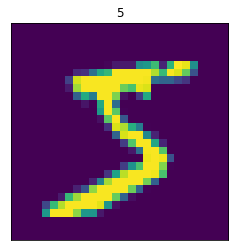

In [9]:
plt.imshow(train_data.data[0]) #use cmap='gray' to view in grayscale
plt.title('%i' % train_data.targets[0])
plt.xticks([])
plt.yticks([])
plt.show()

In [10]:
ex = enumerate(train_loader)
batch_idx, (ex_data, ex_targets) = next(ex)

In [11]:
ex_data.shape

torch.Size([64, 1, 28, 28])

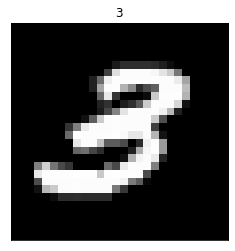

In [12]:
plt.imshow(ex_data[0][0], cmap='gray', interpolation='none')
plt.title('%i' % ex_targets[0])
plt.xticks([])
plt.yticks([])
plt.show()

In [13]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1, out_channels=10, kernel_size=5, stride=1, padding=2
            ),
            nn.ReLU(),
            nn.Dropout2d(),                      
            nn.MaxPool2d(2),
        )

        self.conv2 = nn.Sequential(
            nn.Conv2d(
                in_channels=10, out_channels=32, kernel_size=5, stride=1, padding=2
            ),
            nn.ReLU(),
            nn.Dropout2d(),                      
            nn.MaxPool2d(2),
        )

        self.fc1 = nn.Sequential(
            nn.Linear(1568, 50),
                nn.ReLU(),
                nn.Dropout(),
        )
        
        self.fc2 = nn.Sequential(
            nn.Linear(50, 10),
            nn.Softmax(),
        )

    def forward(self, x):
        super(Net, self).__init__()
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        output = self.fc2(x)
        return output

In [14]:
Net = Net()

In [15]:
loss = nn.CrossEntropyLoss()   
loss

CrossEntropyLoss()

In [16]:
optimizer = optim.SGD(Net.parameters(), lr=learning_rate)

In [17]:
Net.to(device)

Net(
  (conv1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): Dropout2d(p=0.5, inplace=False)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(10, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): Dropout2d(p=0.5, inplace=False)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Sequential(
    (0): Linear(in_features=1568, out_features=50, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
  )
  (fc2): Sequential(
    (0): Linear(in_features=50, out_features=10, bias=True)
    (1): Softmax(dim=None)
  )
)